<a href="https://colab.research.google.com/github/kkc-krish/SQ-Python/blob/main/Scikitlearn_Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Classification


Steps Explained:


1.  Data Loading: The Iris dataset, which is a built-in dataset in Scikit-Learn,
is loaded.

2. Data Preparation: The data is converted into a pandas DataFrame for easier manipulation. Features (X) and target (y) are separated.

3. Data Splitting: The data is split into training and testing sets using train_test_split.

4. Feature Scaling: Standard scaling is applied to the features to normalize the data, which helps the KNN algorithm perform better.

5. Model Training: A K-Nearest Neighbors classifier is initialized and trained on the training data.

6. Model Prediction: The trained model is used to predict the target variable for the test set.

7. Model Evaluation: The model's performance is evaluated using a confusion matrix, classification report, and accuracy score.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Iris dataset
iris = load_iris()

# Convert the dataset into a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Accuracy Score: 1.0


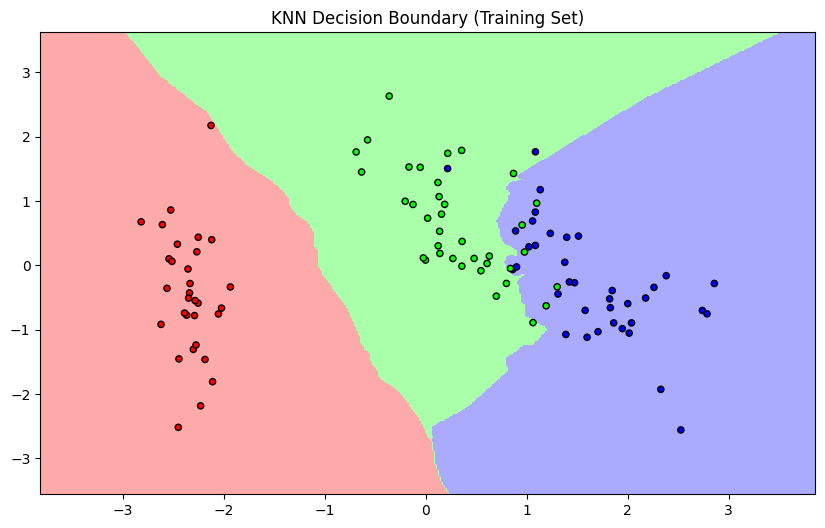

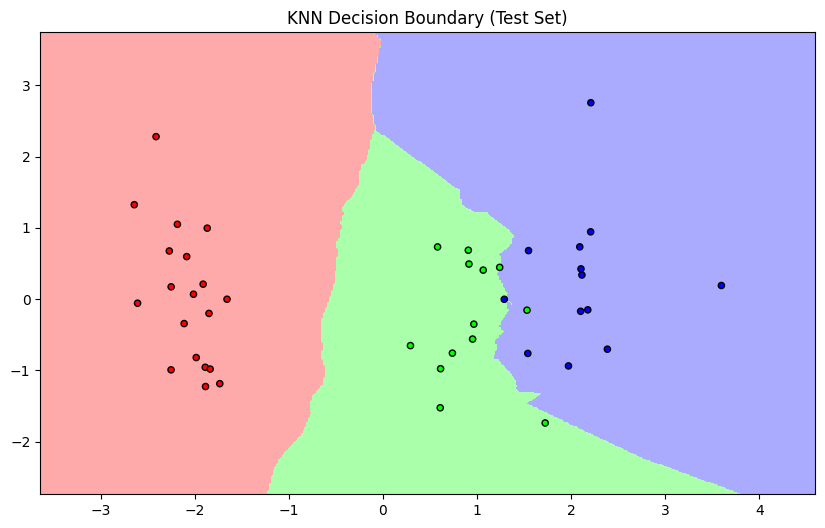

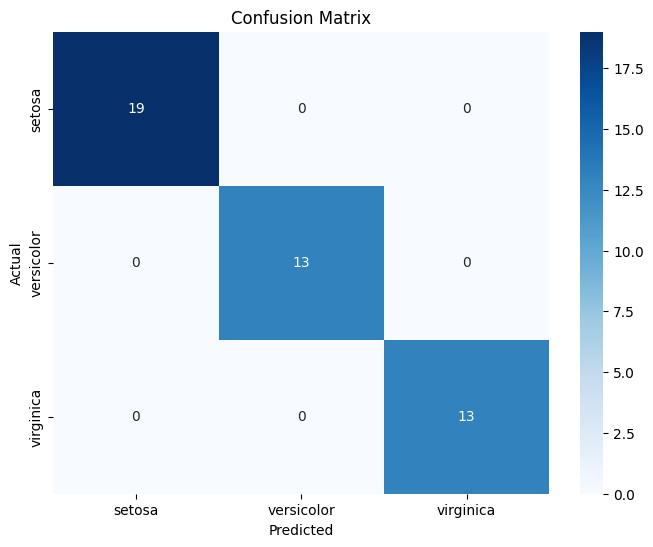

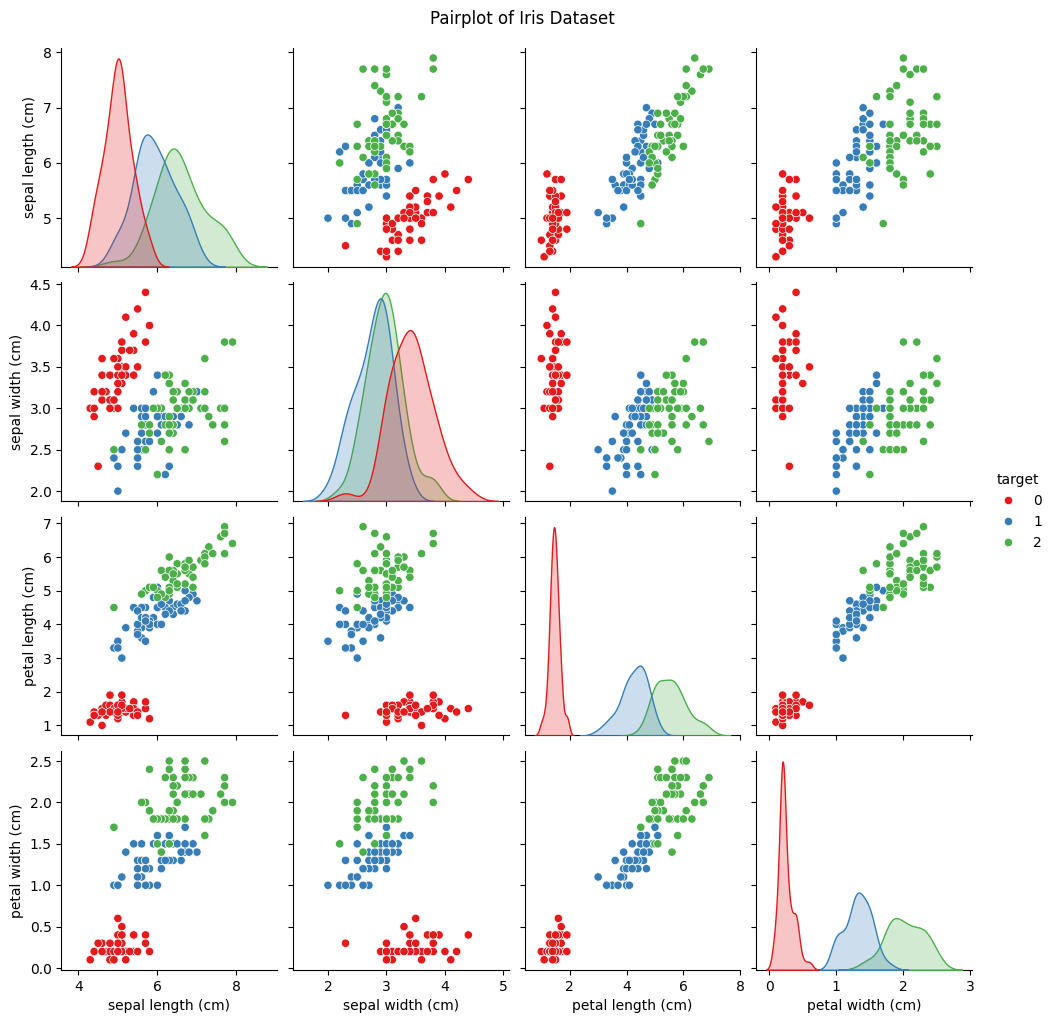

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.decomposition import PCA

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Reduce to 2D using PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # Create a mesh to plot in
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1 # Use X_reduced instead of y_reduced
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict and plot decision boundary
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Plot the decision boundary for the training set
plot_decision_boundary(X_train, y_train, knn, "KNN Decision Boundary (Training Set)")

# Plot the decision boundary for the test set
plot_decision_boundary(X_test, y_test, knn, "KNN Decision Boundary (Test Set)")

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Pairplot to show distribution of features
sns.pairplot(df, hue='target', palette="Set1", diag_kind='kde')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

Decision Boundary Plot: The function plot_decision_boundary reduces the feature space to 2D using PCA and plots the decision boundary created by the KNN classifier. The decision boundaries show which regions of the feature space belong to each class.
The plot is shown separately for the training and test datasets.

Confusion Matrix:The confusion matrix is visualized using a heatmap to show the number of correct and incorrect predictions. This gives insight into how well the model is performing in each class.
Pairplot:

The pairplot shows the distribution of the features and their pairwise relationships across the different classes in the dataset. The diagonal shows the Kernel Density Estimation (KDE) plots for each feature.

# Decision Tree Classification

Decision Tree Classifier:
Theory: A Decision Tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g., whether a feature is greater than a threshold value), each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root to the leaf represent classification rules.

Code:

DecisionTreeClassifier: This initializes the classifier. The criterion parameter defines the function to measure the quality of a split (Gini impurity in this case).

fit method: Trains the model using the training data.

plot_tree: Visualizes the decision tree structure.

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Accuracy Score: 1.0


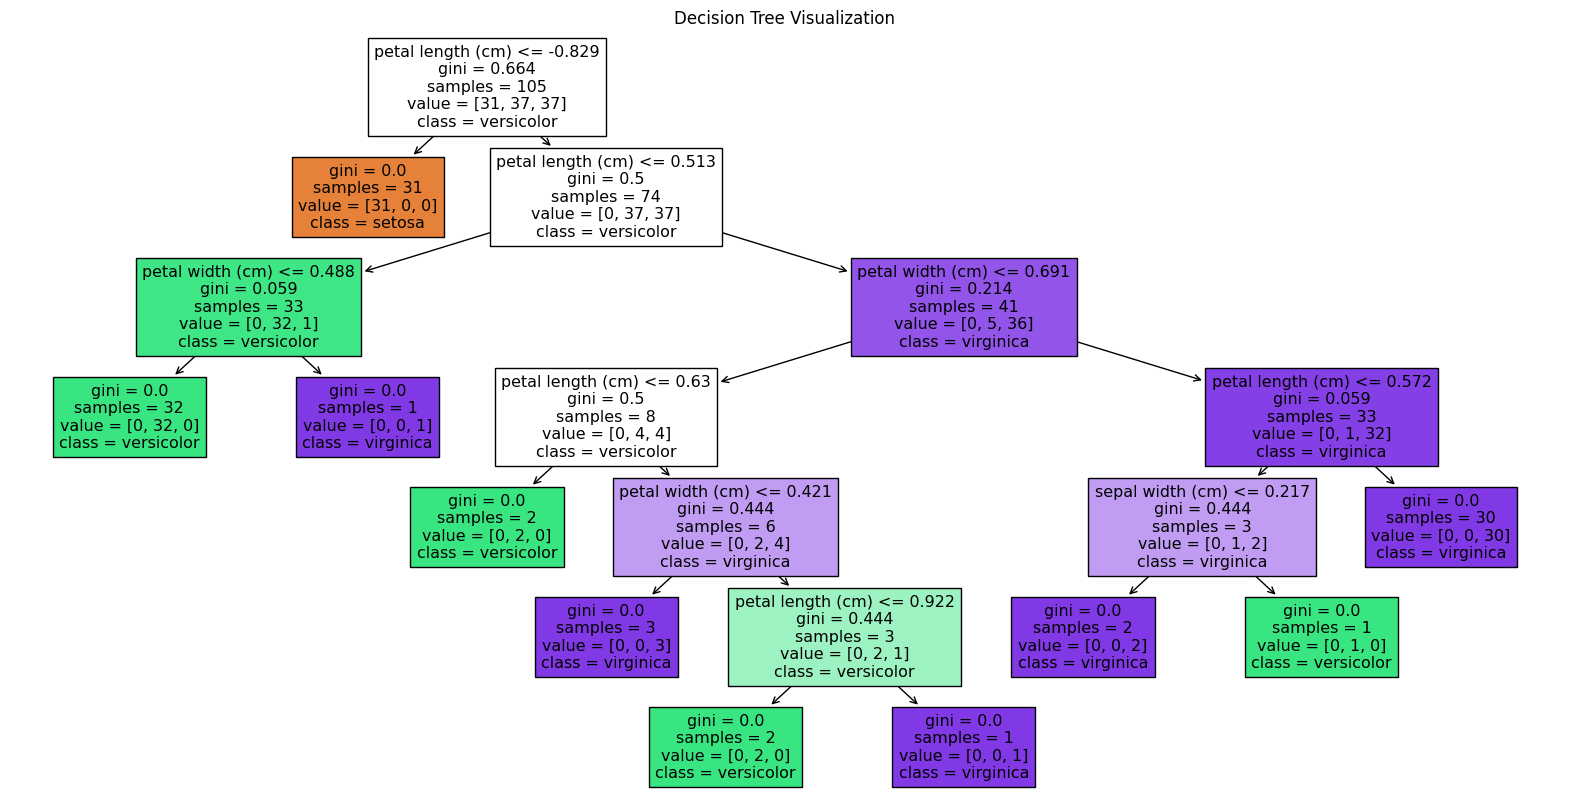

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the Iris dataset
iris = load_iris()

# Convert the dataset into a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Decision Tree classifier
# The criterion 'gini' refers to Gini impurity, which is a measure of how often a randomly chosen element
# from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the set.
dt = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


Random Forest Classifier:
Theory: Random Forest is an ensemble method that builds multiple decision trees and merges them together to get a more accurate and stable prediction. It reduces overfitting by averaging multiple decision trees, each trained on a different random subset of the data.

Code:

RandomForestClassifier: This initializes the Random Forest model. n_estimators defines how many trees the forest should contain.

fit method: Trains the model using the training data.

Feature Importances: Random Forests naturally rank the importance of features based on how much they improve the split. This is visualized using a bar plot

Confusion Matrix (Random Forest):
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Accuracy Score (Random Forest): 1.0


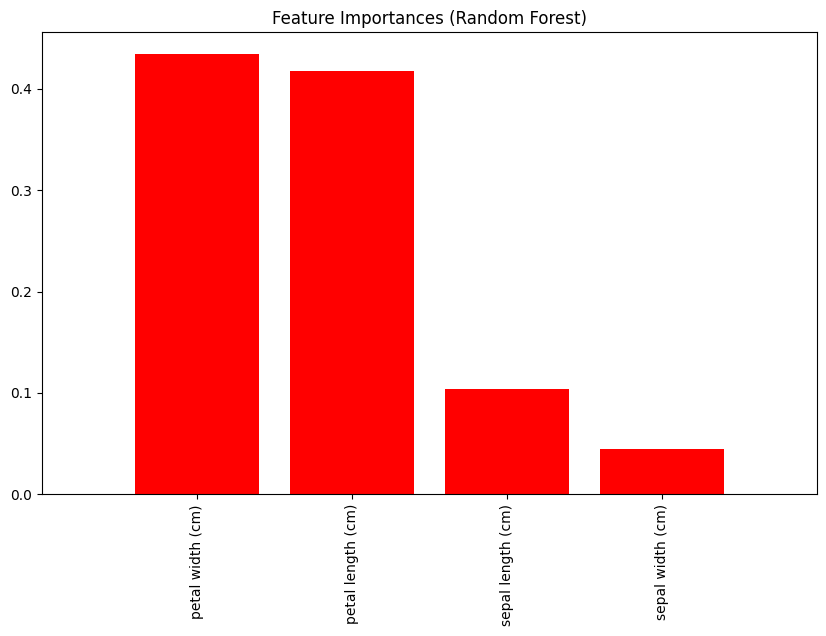

In [5]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
# A Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training
# and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
# n_estimators defines the number of trees in the forest.
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score (Random Forest):", accuracy_score(y_test, y_pred_rf))

# Feature Importance Visualization
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), np.array(iris.feature_names)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# Logistic Regression

Logistic Regression Classifier:

Theory: Logistic Regression is a linear model used primarily for binary classification, though it can be extended to multiclass problems using techniques like One-vs-Rest (OvR). It estimates the probability that an instance belongs to a particular class by fitting a logistic function (sigmoid) to the data.

Code:

LogisticRegression: This initializes the logistic regression model.

The multi_class='ovr' parameter is used to handle multiclass classification by fitting one classifier per class.

fit method: Trains the model using the training data.

Confusion Matrix and Heatmap: Visualizes the performance of the model by comparing actual versus predicted labels.

Confusion Matrix (Logistic Regression):
 [[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45


Accuracy Score (Logistic Regression): 0.9111111111111111


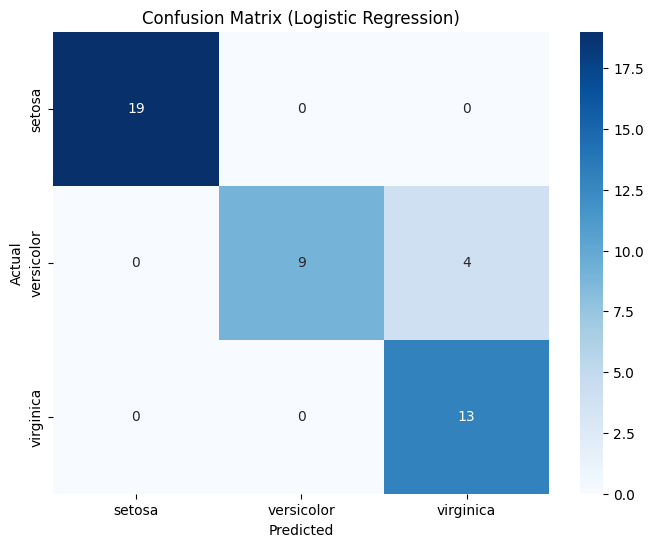

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()

# Convert the dataset into a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression classifier
# Logistic Regression is a linear model used for binary classification (although it can be extended to multiclass problems).
# It estimates the probability that an instance belongs to a particular class.
lr = LogisticRegression(max_iter=200, random_state=42, multi_class='ovr')

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))
print("\nAccuracy Score (Logistic Regression):", accuracy_score(y_test, y_pred_lr))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Support Vector Machine (SVM) Classifier:

Theory: SVM is a powerful classification method that works by finding the hyperplane that best separates the classes in the feature space. It maximizes the margin between the closest points (support vectors) of different classes. SVM can handle both linear and non-linear classification tasks using different kernel functions (e.g., linear, polynomial, radial basis function).

Code:

SVC: Initializes the SVM model. The kernel='linear' parameter specifies that a linear kernel is used, meaning the model will try to find a linear decision boundary.

fit method: Trains the SVM model.

Decision Boundary Plot: Visualizes the decision boundary of the SVM model. PCA is used to reduce the feature space to 2D for visualization.

Confusion Matrix (SVM):
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Accuracy Score (SVM): 0.9777777777777777


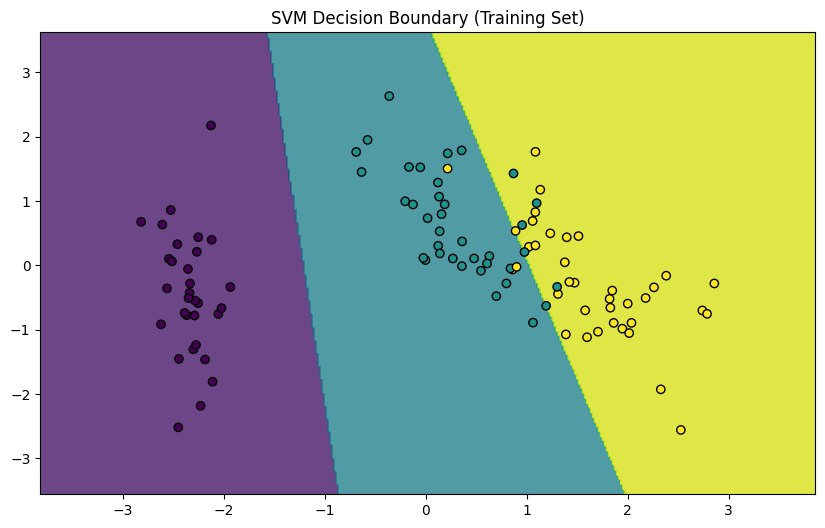

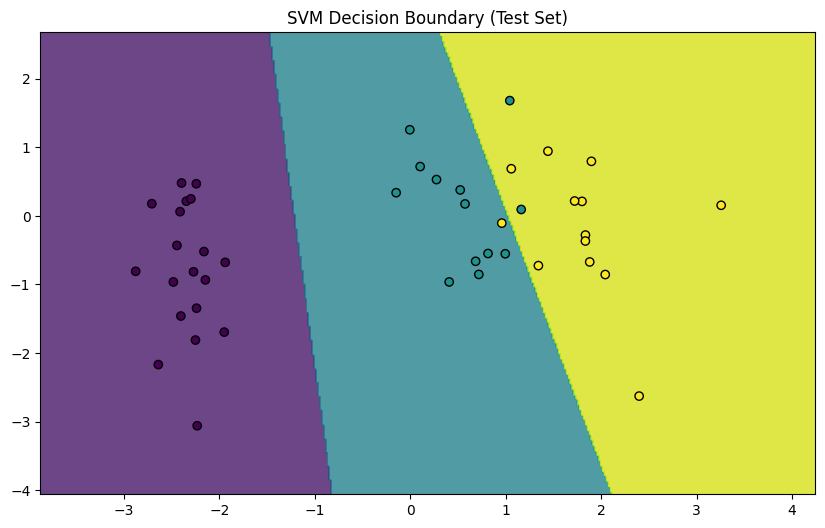

In [10]:
# Import necessary libraries
from sklearn.svm import SVC

# Initialize the SVM classifier
# SVM is a powerful classification method that works by finding the hyperplane that best separates the classes in the feature space.
# It maximizes the margin between the closest points (support vectors) of different classes.
# The kernel parameter allows SVM to handle non-linear classification tasks (e.g., 'linear', 'rbf', 'poly').
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))
print("\nAccuracy Score (SVM):", accuracy_score(y_test, y_pred_svm))



# Visualize the decision boundary using PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot decision boundaries
def plot_svm_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Transform the grid to the original feature space
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_original = pca.inverse_transform(grid)  # Transform back to 4 features

    Z = model.predict(grid_original)  # Use the original feature space for prediction
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Plot the decision boundary for the training set
plot_svm_decision_boundary(X_train_pca, y_train, svm, "SVM Decision Boundary (Training Set)")

# Plot the decision boundary for the test set
plot_svm_decision_boundary(X_test_pca, y_test, svm, "SVM Decision Boundary (Test Set)")

# Model Evaluation

Model evaluation is crucial to understanding how well a machine learning model performs on unseen data. It typically involves splitting the data into training and testing sets, then using various metrics to evaluate the model's performance.

Concepts:
Training and Testing Split: The data is divided into two sets, one for training the model and one for testing it. This helps in assessing how well the model generalizes to new data.
Cross-Validation: A technique used to assess the performance of a model by dividing the data into multiple subsets and training/testing the model multiple times on different subsets.
Evaluation Metrics: Metrics like accuracy, precision, recall, F1-score, and confusion matrix are used to evaluate the performance of a classification model.

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
# Accuracy: The proportion of correctly classified instances among all instances.
accuracy = accuracy_score(y_test, y_pred)
# Precision: The proportion of true positive instances among all positive predictions.
precision = precision_score(y_test, y_pred, average='macro')
# Recall: The proportion of true positive instances among all actual positive instances.
recall = recall_score(y_test, y_pred, average='macro')
# F1 Score: The harmonic mean of precision and recall, useful for imbalanced datasets.
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix: A table used to describe the performance of a classification model.
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report: Provides a detailed performance report including precision, recall, and F1 score for each class.
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Cross-Validation: Evaluates model performance across multiple data splits (folds).
# It provides a better estimate of the model's ability to generalize to unseen data.
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Cross-Validation Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean CV Score: 0.9533333333333334


The ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classifier as its discrimination threshold is varied. The AUC (Area Under the Curve) measures the entire two-dimensional area underneath the ROC curve, providing a single scalar value to summarize the model's performance.

Concepts:

True Positive Rate (TPR) or Sensitivity: The proportion of true positive instances among all actual positive instances.

False Positive Rate (FPR): The proportion of false positive instances among all actual negative instances.

ROC Curve: A plot of TPR against FPR for different threshold values.

AUC: The area under the ROC curve, where a value closer to 1 indicates a better model.

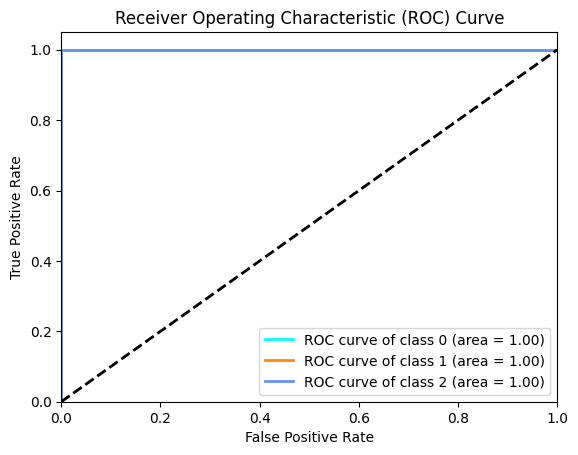

In [12]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = label_binarize(iris.target, classes=[0, 1, 2])

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Decision Tree classifier with One-vs-Rest strategy for multiclass classification
model = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
model.fit(X_train, y_train)

# Predict probabilities
y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Hyperparameter Optimization
Hyperparameter optimization involves finding the best combination of parameters for a machine learning model that results in the highest performance. Scikit-Learn provides methods like GridSearchCV and RandomizedSearchCV to automate this process.

Concepts:

Hyperparameters: Parameters of a model that are not learned from the data but are set before training begins. Examples include the number of trees in a Random Forest, the learning rate in Gradient Boosting, etc.

Grid Search: An exhaustive search over specified parameter values. It tries all combinations of parameters and returns the best one.

Randomized Search: Similar to Grid Search but samples from a distribution of parameters rather than trying every possible combination.

In [13]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model using GridSearch
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
print("Best Parameters found by GridSearch:", grid_search.best_params_)

# Predict the labels for the test set using the best estimator
y_pred_grid = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy with GridSearch: {accuracy_grid}")

# Define the parameter distribution for RandomizedSearch
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=200, num=20)],
    'max_depth': [None] + [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)

# Train the model using RandomizedSearch
random_search.fit(X_train, y_train)

# Get the best parameters from the randomized search
print("Best Parameters found by RandomizedSearch:", random_search.best_params_)

# Predict the labels for the test


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters found by GridSearch: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Accuracy with GridSearch: 1.0
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters found by RandomizedSearch: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 90, 'bootstrap': True}


K-Fold Cross-Validation is a powerful technique for model evaluation that involves splitting the dataset into 'k' subsets (folds). The model is trained on 'k-1' folds and tested on the remaining fold. This process is repeated 'k' times, with each fold serving as the test set exactly once. The performance metrics are then averaged to provide a more robust estimate of the model's generalization performance.

Concepts:
K-Fold Cross-Validation: This involves dividing the dataset into 'k' equal-sized folds. The model is trained on 'k-1' folds and evaluated on the remaining fold. This process is repeated 'k' times, and the average performance across all 'k' trials is reported.
Stratified K-Fold: A variant of K-Fold Cross-Validation that ensures each fold has a similar distribution of classes, which is especially important for imbalanced datasets.


In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Define the number of folds
k = 5  # 5-Fold Cross-Validation

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize StratifiedKFold (to maintain class distribution across folds)
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
kf_accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    kf_accuracies.append(fold_accuracy)

print(f"K-Fold Cross-Validation Accuracies: {kf_accuracies}")
print(f"Mean Accuracy (K-Fold): {np.mean(kf_accuracies)}")

# Perform Stratified K-Fold Cross-Validation
skf_accuracies = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    skf_accuracies.append(fold_accuracy)

print(f"Stratified K-Fold Cross-Validation Accuracies: {skf_accuracies}")
print(f"Mean Accuracy (Stratified K-Fold): {np.mean(skf_accuracies)}")

# Using cross_val_score for K-Fold Cross-Validation
# cross_val_score simplifies the process by automatically splitting the data and computing the scores
# The `cv` parameter determines the number of folds

cv_scores = cross_val_score(model, X, y, cv=k)
print(f"Cross-Validation Scores with cross_val_score: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


K-Fold Cross-Validation Accuracies: [1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667]
Mean Accuracy (K-Fold): 0.9600000000000002
Stratified K-Fold Cross-Validation Accuracies: [0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9]
Mean Accuracy (Stratified K-Fold): 0.9466666666666667
Cross-Validation Scores with cross_val_score: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Score: 0.9666666666666668
